In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import jinja2
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [66]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")
df.shape

(1014, 7)

In [67]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [68]:
df1 = df.copy(deep=True)

In [69]:
df1.RiskLevel.value_counts(dropna=False)

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [70]:
df1.RiskLevel.replace(to_replace=['low risk','mid risk','high risk'],value=['0','1','2'],inplace=True)

In [71]:
df1.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2


In [72]:
df1.RiskLevel.value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

In [73]:
df1.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [75]:
df1.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [76]:
numerical = [var for var in df1.columns if df1[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
if len(numerical)>1:
    print('The numerical variables :', numerical)

There are 6 numerical variables

The numerical variables : ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SystolicBP'}>],
       [<AxesSubplot: title={'center': 'DiastolicBP'}>,
        <AxesSubplot: title={'center': 'BS'}>],
       [<AxesSubplot: title={'center': 'BodyTemp'}>,
        <AxesSubplot: title={'center': 'HeartRate'}>]], dtype=object)

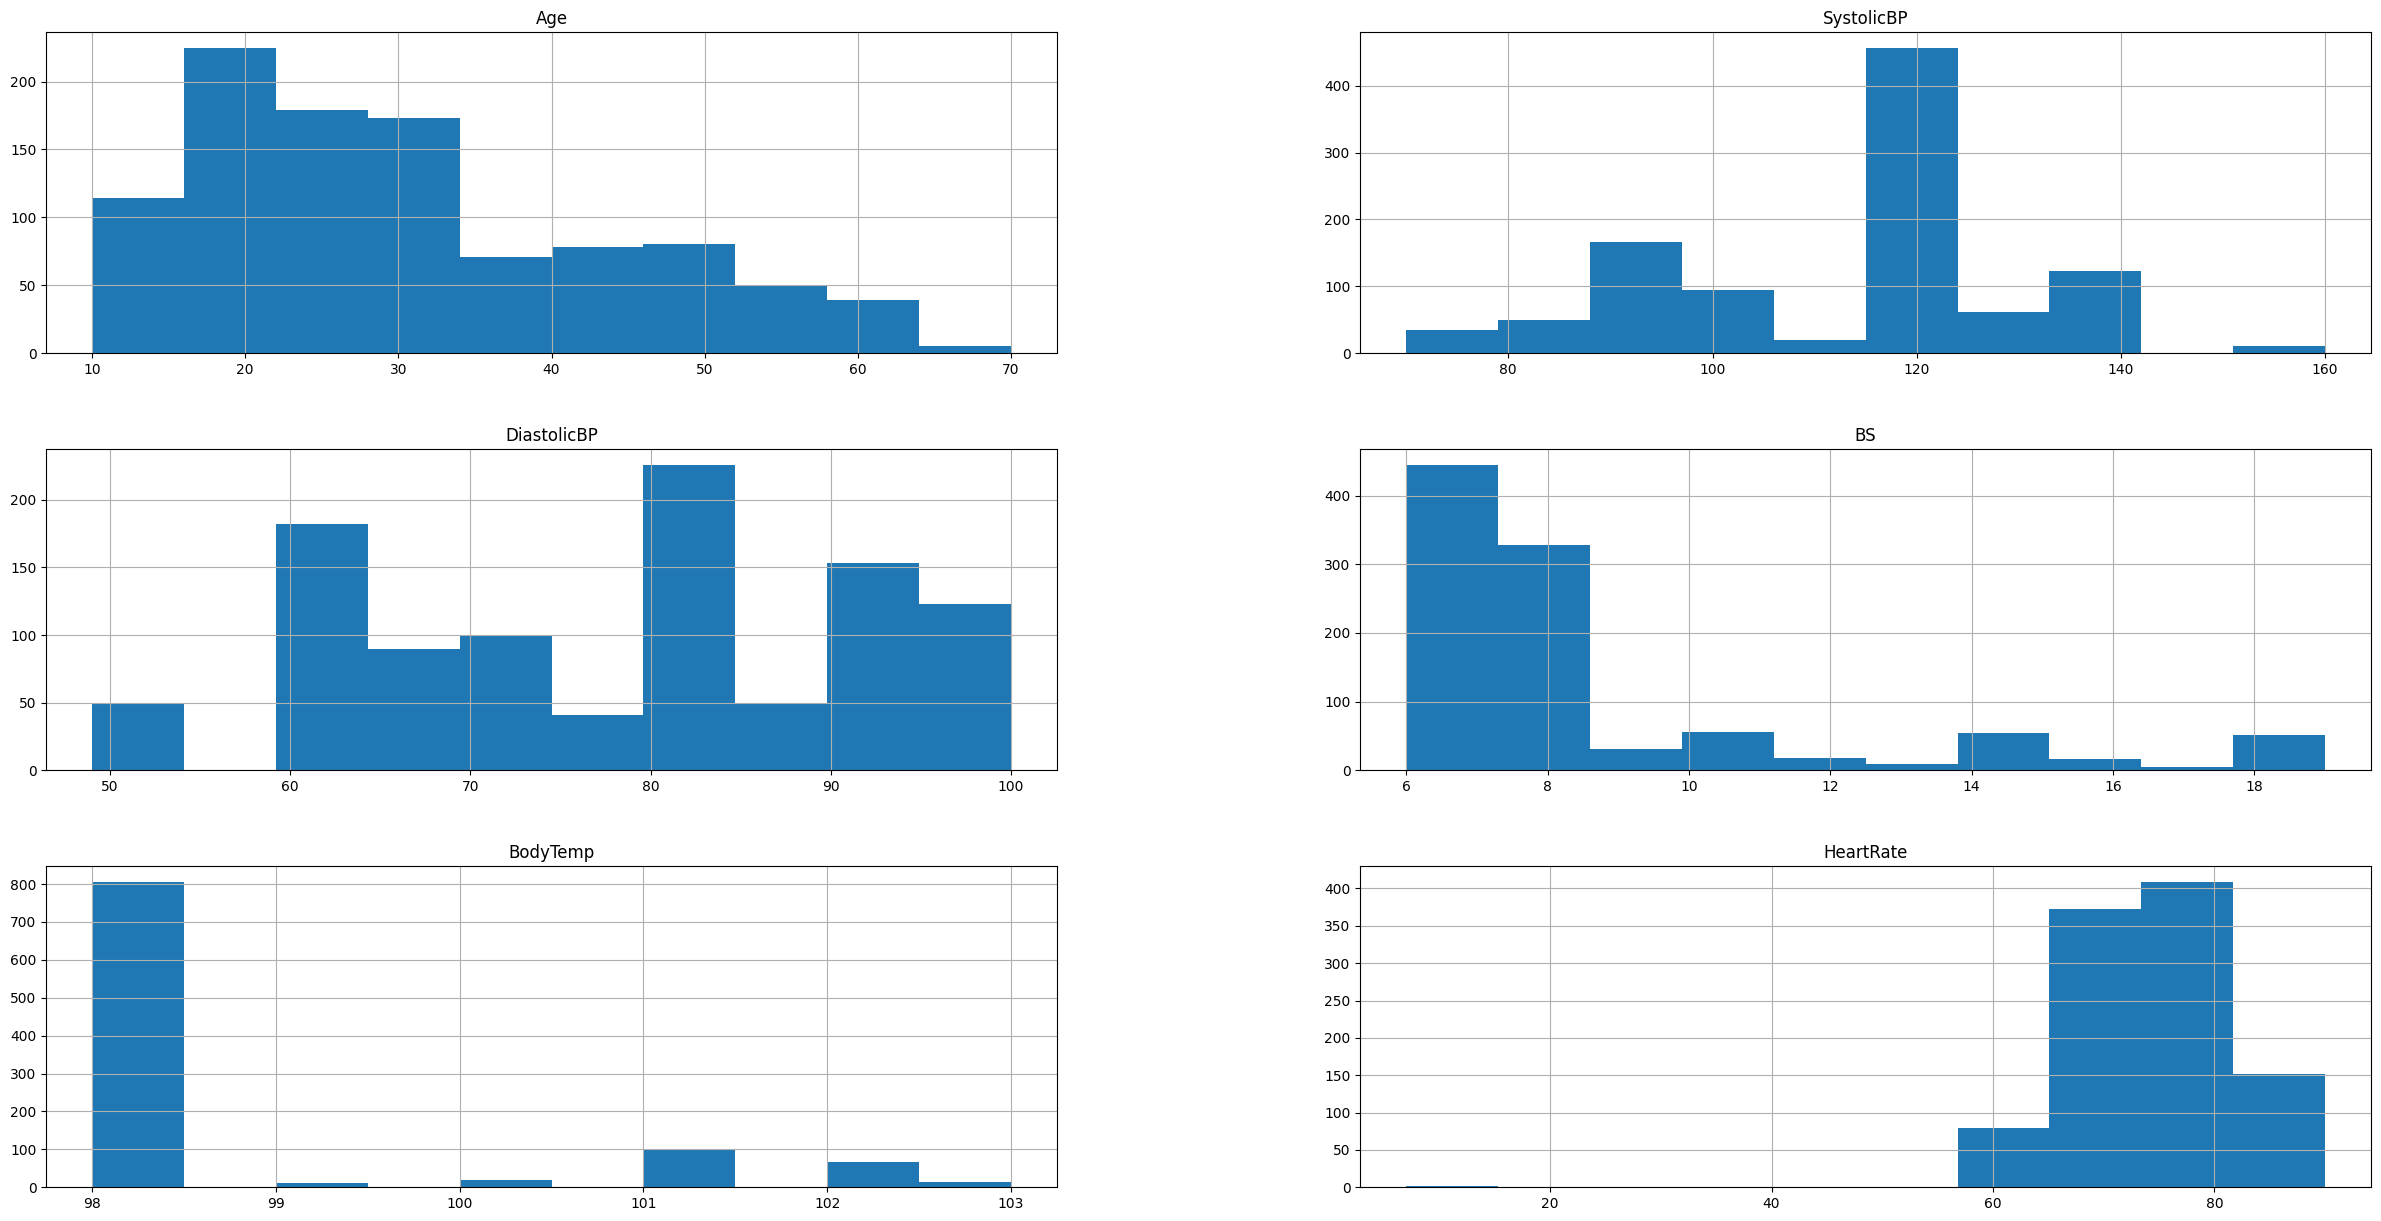

In [77]:
df1[numerical].hist(figsize=(30,15))

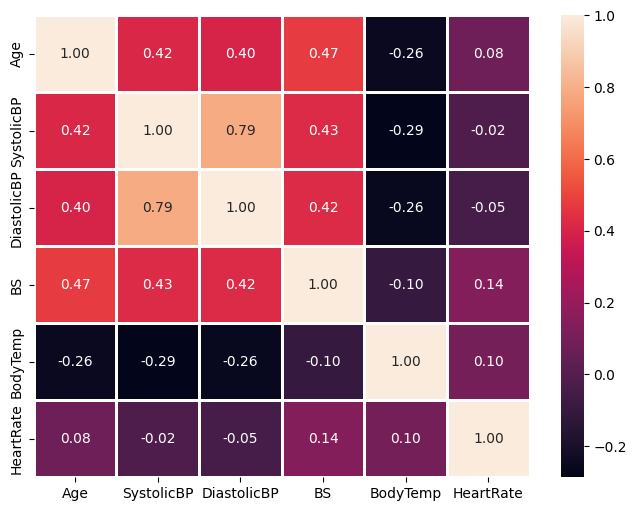

In [78]:
plt.figure(figsize=(8,6))
sns.heatmap(df1[numerical].corr(),annot=True,fmt='.2f',linewidths=2)
plt.show()

In [79]:
#Using the InterQuartile Range to fill the values
def remove_outlier(i , col):
    Q1 = i[col].quantile(0.25)
    Q3 = i[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df1[col] = np.clip(i[col] , lower_whisker , upper_whisker)
    return i

def treat_outliers_all(df , col_list):
    for c in col_list:
        i = remove_outlier(df , c)
    return i

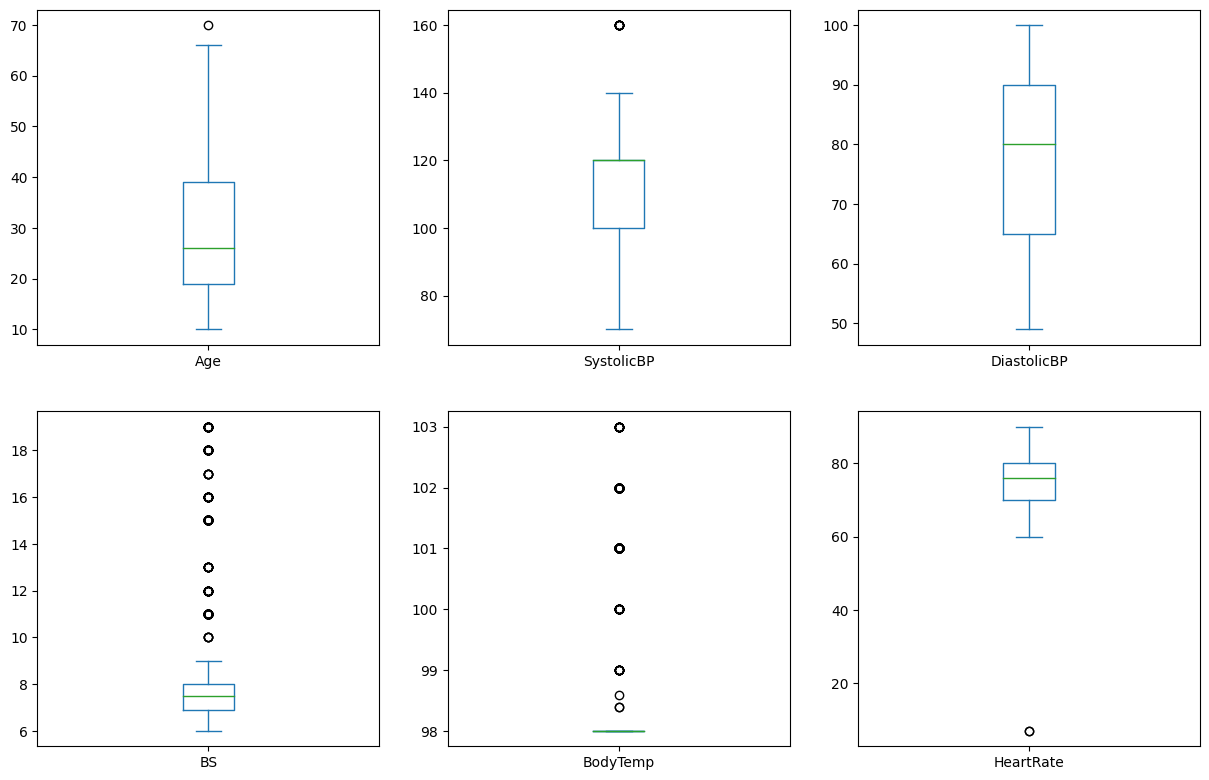

In [80]:
df1[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [81]:
rem_list = ['Age','SystolicBP']

In [82]:
df2 = treat_outliers_all(df1 , rem_list)

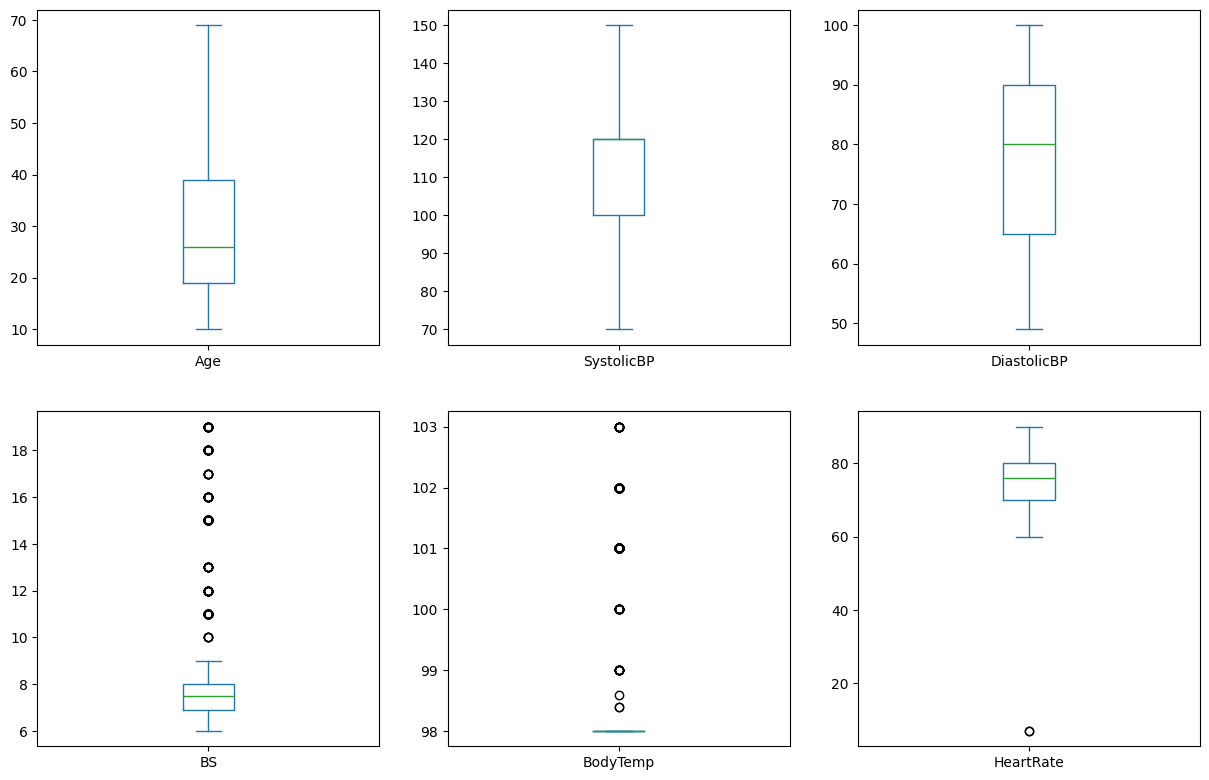

In [83]:
df2[numerical].plot(kind = "box",subplots = True,layout = (4,3),figsize=(15,20)) #Boxplot to check the outliers
plt.show()

In [84]:
df2.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.870809,113.099606,76.460552,8.725986,98.665089,74.301775
std,13.471482,18.178042,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,69.000000,150.000000,100.000000,19.000000,103.000000,90.000000


Feature Engineering

In [305]:
X = df2.drop(['RiskLevel'],axis=1)
y = df2.RiskLevel

X.shape,y.shape

((1014, 6), (1014,))

In [306]:
y.value_counts()

0    406
1    336
2    272
Name: RiskLevel, dtype: int64

In [307]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,stratify=y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811,), (203,))

In [308]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

LR cant be used since multi class

KNN

In [208]:
from math import sqrt
print(sqrt(X_train.shape[1]))

2.449489742783178


In [209]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,5)
#20 because sqrt of len(X_train)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

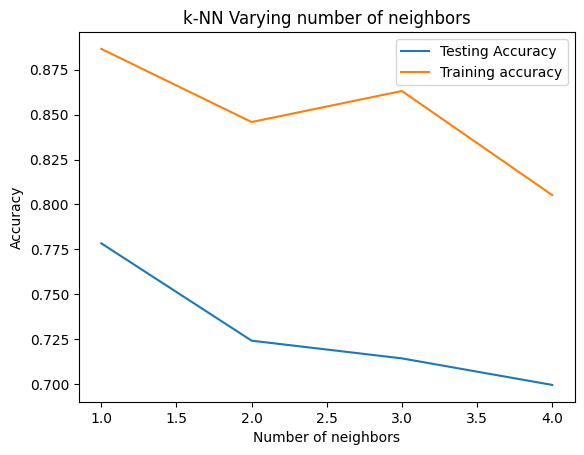

In [210]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [211]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train, y_train)
    
#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)
    
#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

print('Training accuracy: ',train_accuracy)
print('\nTesting accuracy: ',test_accuracy)

Training accuracy:  0.8631319358816276

Testing accuracy:  0.7142857142857143


In [212]:
y_pred = knn.predict(X_test)

In [213]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[57, 23,  1],
       [19, 43,  5],
       [ 8,  2, 45]], dtype=int64)

In [214]:
knn_accuracy = knn.score(X_test, y_test)
knn_accuracy

0.7142857142857143

In [215]:
# precision
knn_pre = precision_score(y_test, y_pred,average='weighted')
knn_pre

0.7185287908266754

In [216]:
# recall
knn_rec = recall_score(y_test, y_pred,average='weighted')
knn_rec

0.7142857142857143

Random Forests

In [217]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=12,n_estimators=10)

# fit the model
rfc.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8276


In [218]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc_100 = RandomForestClassifier(random_state=12,n_estimators=100)

# fit the model
rfc_100.fit(X_train_RF, y_train)

# Predict the Test set results
y_pred = rfc_100.predict(X_test_RF)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8522


In [219]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9309
Test set score: 0.8522


In [220]:
y_pred = rfc_100.predict(X_test_RF)

In [221]:
print('Training set score: {:.4f}'.format(rfc_100.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(rfc_100.score(X_test_RF, y_test)))

Training set score: 0.9309
Test set score: 0.8522


In [222]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

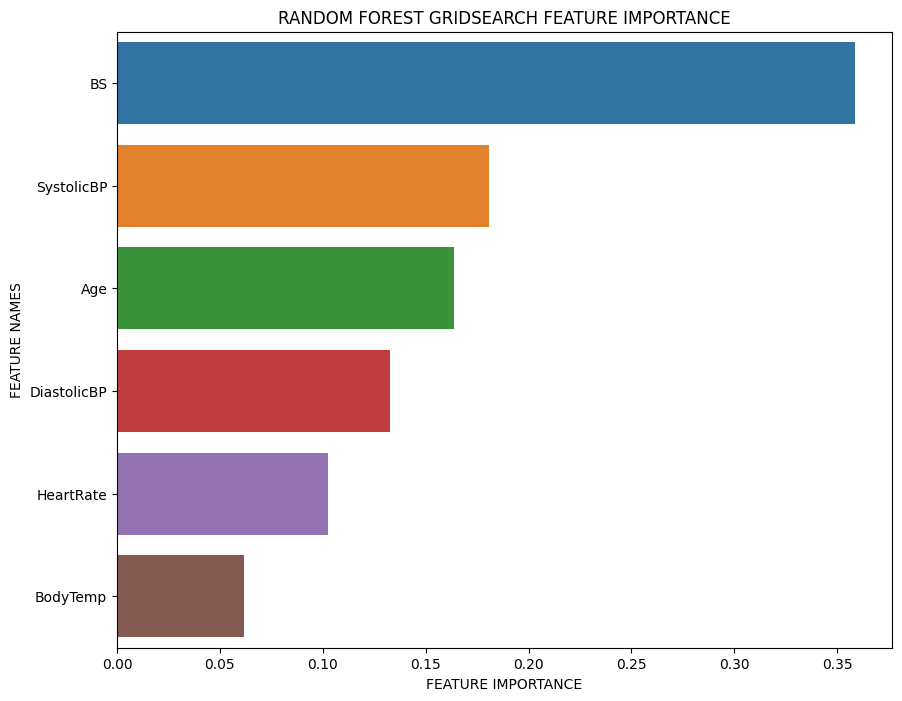

In [223]:
plot_feature_importance(rfc_100.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [224]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[66, 13,  2],
       [ 8, 54,  5],
       [ 2,  0, 53]], dtype=int64)

In [225]:
rfc100_accuracy = rfc_100.score(X_test_RF, y_test)
rfc100_accuracy

0.8522167487684729

In [226]:
# precision
rf100_pre = precision_score(y_test, y_pred,average='weighted')
rf100_pre

0.8518494512142425

In [227]:
# recall
rf100_rec = recall_score(y_test, y_pred,average='weighted')
rf100_rec

0.8522167487684729

Gridsearch

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {
    'n_estimators': [100, 150, 200, 250, 300,500,1000],
    'max_depth': [10, 20, None],
    'bootstrap':[True],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,5,10]
}
regr = RandomForestClassifier(random_state=12)

clf = GridSearchCV(regr, parameters,verbose=10,n_jobs=6,cv=3)
clf.fit(X_train_RF, y_train)
print("Best params: ", clf.best_params_)

Fitting 3 folds for each of 189 candidates, totalling 567 fits
Best params:  {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [310]:
y_pred = clf.predict(X_test_RF)

In [311]:
print('Training set score: {:.4f}'.format(clf.score(X_train_RF, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test_RF, y_test)))

Training set score: 0.9309
Test set score: 0.8522


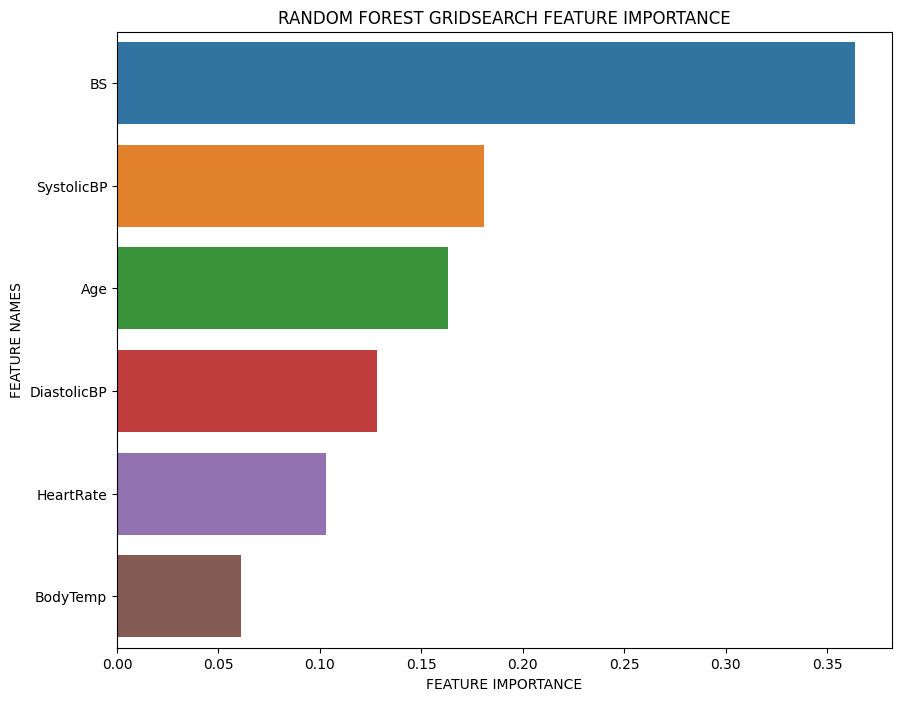

In [312]:
plot_feature_importance(clf.best_estimator_.feature_importances_,X_train_RF.columns,'RANDOM FOREST GRIDSEARCH ')

In [313]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[67, 12,  2],
       [ 9, 53,  5],
       [ 2,  0, 53]], dtype=int64)

In [314]:
rfcv_accuracy = clf.score(X_test_RF, y_test)
rfcv_accuracy

0.8522167487684729

In [315]:
# precision
rfcv_pre = precision_score(y_test, y_pred,average='weighted')
rfcv_pre

0.8511873184286975

In [316]:
# recall
rfcv_rec = recall_score(y_test, y_pred,average='weighted')
rfcv_rec

0.8522167487684729

CNN

In [244]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [246]:
l_encode = LabelEncoder()
l_encode.fit(y)
Y = l_encode.transform(y)
Y = to_categorical(Y)
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [247]:
# create X and Y datasets for training
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y,stratify=Y, random_state=42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((811, 6), (203, 6), (811, 3), (203, 3))

In [264]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns
scaler = MinMaxScaler()
X_train_RF = scaler.fit_transform(X_train)
X_test_RF = scaler.transform(X_test)

X_train_RF = pd.DataFrame(X_train_RF,columns=cols)
X_test_RF = pd.DataFrame(X_test_RF,columns=cols)

In [265]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
# Importing libraries for building the neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf

In [280]:
maternal_model = Sequential()
maternal_model.add(Dense(256, input_shape = (X_train_RF.shape[1],), activation = "relu"))
maternal_model.add(Dense(512, activation = "relu"))
maternal_model.add(Dense(1024, activation = "relu"))
maternal_model.add(Dropout(0.2))
maternal_model.add(Dense(1024, activation = "relu"))
maternal_model.add(Dense(512, activation = "relu"))
maternal_model.add(Dense(256, activation = "relu"))
maternal_model.add(Flatten())
maternal_model.add(Dense(512, activation = "relu"))
maternal_model.add(Dropout(0.5))
maternal_model.add(Dense(512, activation = "relu"))
maternal_model.add(Dropout(0.5))
# maternal_model.add(Dense(1, activation = "sigmoid",kernel_regularizer = "binary_crossentropy"))
maternal_model.add(Dense(3, activation = "softmax"))
maternal_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 256)               1792      
                                                                 
 dense_132 (Dense)           (None, 512)               131584    
                                                                 
 dense_133 (Dense)           (None, 1024)              525312    
                                                                 
 dropout_42 (Dropout)        (None, 1024)              0         
                                                                 
 dense_134 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_135 (Dense)           (None, 512)               524800    
                                                                 
 dense_136 (Dense)           (None, 256)             

In [281]:
optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
losses = tf.keras.losses.categorical_crossentropy
maternal_model.compile(optimizer=optimizer, loss=losses, metrics=['accuracy'])

In [282]:
m_loss = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=30,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [283]:
save_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='maternal_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [284]:
history=maternal_model.fit(X_train_RF, y_train, epochs=100,validation_split=0.2, batch_size=5, verbose=1,callbacks=[m_loss,save_checkpoint])

Epoch 1/100
123/130 [===========================>..] - ETA: 0s - loss: 1.0041 - accuracy: 0.4911
Epoch 1: val_accuracy improved from -inf to 0.57055, saving model to maternal_model.h5
130/130 [==============================] - 1s 8ms/step - loss: 1.0050 - accuracy: 0.4938 - val_loss: 0.8966 - val_accuracy: 0.5706
Epoch 2/100
125/130 [===========================>..] - ETA: 0s - loss: 0.8983 - accuracy: 0.5424
Epoch 2: val_accuracy did not improve from 0.57055
130/130 [==============================] - 0s 3ms/step - loss: 0.8962 - accuracy: 0.5386 - val_loss: 0.9113 - val_accuracy: 0.5706
Epoch 3/100
119/130 [==========================>...] - ETA: 0s - loss: 0.8804 - accuracy: 0.5378
Epoch 3: val_accuracy improved from 0.57055 to 0.61350, saving model to maternal_model.h5
130/130 [==============================] - 1s 4ms/step - loss: 0.8651 - accuracy: 0.5448 - val_loss: 0.8578 - val_accuracy: 0.6135
Epoch 4/100
125/130 [===========================>..] - ETA: 0s - loss: 0.8611 - accuracy

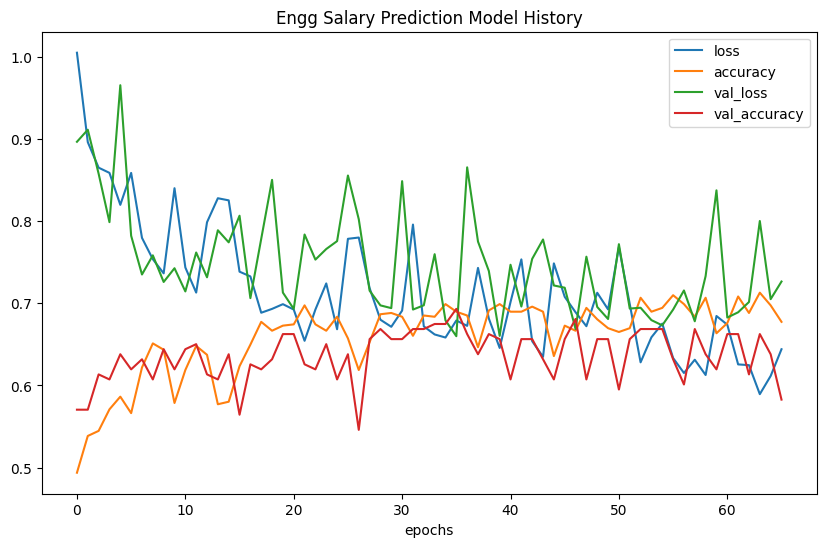

In [285]:
dfh = pd.DataFrame(history.history)
plt.figure(figsize=(10, 6))
plt.title('Engg Salary Prediction Model History')
plt.plot(dfh)
plt.xlabel('epochs')
plt.legend(dfh.columns)
plt.show()

In [287]:
print("Evaluate maternal_model against trained data")
score = maternal_model.evaluate(X_train_RF, y_train, verbose=0)
print("score %s: %.2f%%" % (maternal_model.metrics_names[1], score[1]*100))

print("Evaluate maternal_model against test data")
score = maternal_model.evaluate(X_test_RF, y_test, verbose=0)
print("score %s: %.2f%%" % (maternal_model.metrics_names[1], score[1]*100))

Evaluate maternal_model against trained data
score accuracy: 69.17%
Evaluate maternal_model against test data
score accuracy: 70.44%


In [317]:
# creating performance dictionary
performance = {'Accuracy_Score':[knn_accuracy, rfc100_accuracy,rfcv_accuracy, score[1]],
              'Precision':[ knn_pre, rf100_pre,rfcv_pre,'NA'],
              'Recall': [knn_rec, rf100_rec,rfcv_rec,'NA']}

In [318]:
performance_df = pd.DataFrame(data = performance, index= ['KNeighbors', 
                                                             'RandomForest',
                                                             'RandomForest Gridsearch',
                                                                'ANN'])

In [319]:
performance_df

,Accuracy_Score,Precision,Recall
KNeighbors,0.714286,0.718529,0.714286
RandomForest,0.852217,0.851849,0.852217
RandomForest Gridsearch,0.852217,0.851187,0.852217
ANN,0.704434,NA,NA
